In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.constants import sigma_sb
from astropy.constants import L_sun

erg / (Hz s sr cm2)


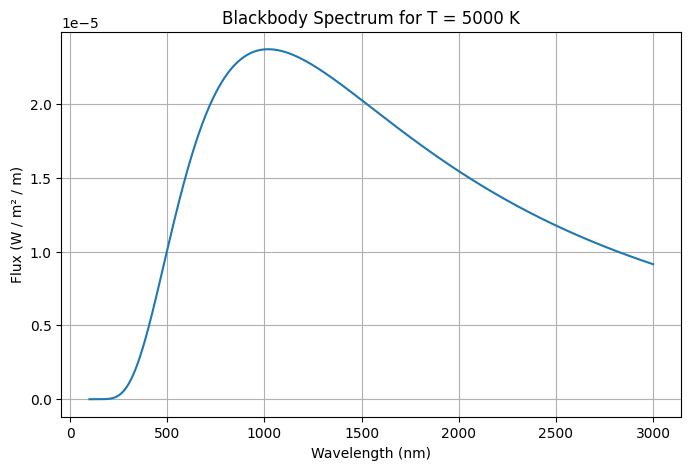

In [2]:
# Choose a temperature
T = 5000  # Kelvin, like the Sun

# Wavelength array (meters)
wavelength = np.linspace(1e-7, 3e-6, 1000) * u.m  # 100 nm to 3000 nm

# Create blackbody model
bb = BlackBody(temperature=T * u.K)
flux = bb(wavelength)  # W / m² / m
print(flux.unit)

# Plot
plt.figure(figsize=(8,5))
plt.plot(wavelength.to(u.nm), flux)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (W / m² / m)')
plt.title(f'Blackbody Spectrum for T = {T} K')
plt.grid(True)
plt.show()

In [3]:
#Load B and V filter transmission curves
B_data = np.loadtxt("Generic_Bessell.B.dat", delimiter=" ", skiprows=0)  # skip header row if needed
V_data = np.loadtxt("Generic_Bessell.V.dat", delimiter=" ", skiprows=0)

wavelength_B = B_data[:,0] * u.AA
trans_B = B_data[:,1]

wavelength_V = V_data[:,0] * u.AA
trans_V = V_data[:,1]

In [4]:
#wavelength_V =wavelength_V.to(u.m)
#wavelength_B =wavelength_B.to(u.m)

In [5]:
#Stellar temperatures
temperatures = np.array([4000,5770,8000, 10000, 20000,30000,40000]) * u.K  # Example temperatures

In [6]:
#Function to find integrated flux through a filter
def integrated_flux(temperature, wavelength, transmission):
    #wavelength_m = wavelength.to(u.m)
    #print(wavelength.unit)
    bb = BlackBody(temperature=temperature)
    flux = bb(wavelength.value)
    print(flux.unit)
    #print(flux)
    # Weighted flux through filter
    flux_int = np.trapz(flux * transmission, wavelength)
    return flux_int


In [7]:
#Sun fluxes
T_sun = 5770 * u.K
F_B_sun = integrated_flux(T_sun, wavelength_B, trans_B)
F_V_sun = integrated_flux(T_sun, wavelength_V, trans_V)
#F_V_sun_cgs = F_V_sun.to(u.erg / (u.s * u.cm**2))
print(F_V_sun)

erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
4.831398607881661e-23 Angstrom erg / (Hz s sr cm2)


In [8]:
#Compute B-V for each star
B = []
V = []
B_minus_V = []
for T in temperatures:
    F_B = integrated_flux(T, wavelength_B, trans_B)
    F_V = integrated_flux(T, wavelength_V, trans_V)
    #print(F_V.unit)
    F_bol = sigma_sb * T**4
    # Use Sun to set zero point
    BV = -2.5*np.log10(F_B/F_V) + 2.5*np.log10(F_B_sun/F_V_sun) + 0.65
    V.append(F_V.value)
    B_minus_V.append(BV.value)

B_minus_V = np.array(B_minus_V)
V = np.array(V)*F_V_sun.unit

erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)
erg / (Hz s sr cm2)


In [9]:
#Load model from CSV for comparison
model_data = np.loadtxt("Q3_model_curves.csv", delimiter=",", skiprows=1)  # columns: Teff, BV
T_model = model_data[:,0]
BV_model = model_data[:,1]
BC_model = model_data[:,2]

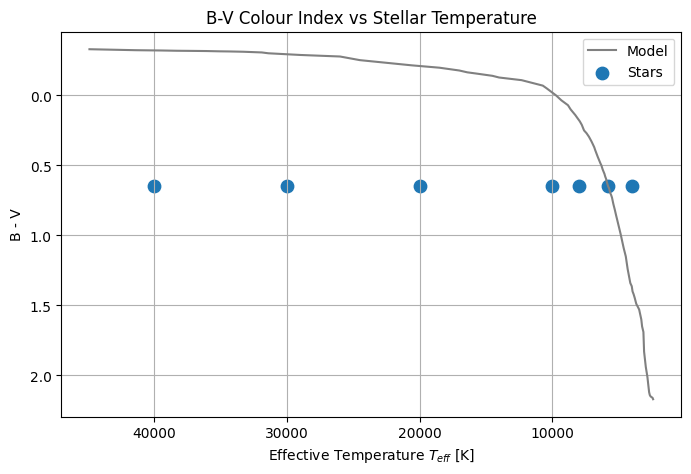

In [10]:
#Plot results
plt.figure(figsize=(8,5))
plt.plot(T_model, BV_model, label='Model', color='grey')
plt.scatter(temperatures.value, B_minus_V, s=80, label='Stars')
plt.xlabel('Effective Temperature $T_{eff}$ [K]')
plt.ylabel('B - V')
plt.title('B-V Colour Index vs Stellar Temperature')
plt.gca().invert_xaxis()  #hot stars on left, cool on right
plt.gca().invert_yaxis()  #Bluer stars on top
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def integrated_bol_flux(temperature,num=5000):
    # Peak wavelength
    lambda_peak = (2.898e-3 *u.m *u.K / temperature)   # meters
    # Wide wavelength range
    lam_min = lambda_peak * 0.1
    lam_max = lambda_peak * 10
    wavelength = np.linspace(lam_min, lam_max, num)
    #print(wavelength.unit)
    bb = BlackBody(temperature=temperature)
    F_bol = bb.bolometric_flux
    #flux = bb(wavelength)
    #print(flux.unit)
    #F_bol = np.trapz(flux.value, wavelength.value) * flux.unit
    #print(F_bol.unit)
    return F_bol

F_bol_sun = integrated_bol_flux(T_sun)
print(F_bol_sun) 

20006223515.653194 erg / (s cm2)


In [12]:
Bol = []
for T in temperatures:
    Bol.append(integrated_bol_flux(T).value)
Bol = np.array(Bol)*F_bol_sun.unit
print(Bol)

[4.62063676e+09 2.00062235e+10 7.39301882e+10 1.80493624e+11
 2.88789798e+12 1.46199835e+13 4.62063676e+13] erg / (s cm2)


In [13]:

#Bol = Bol.to(u.erg * u.AA)
#F_bol_sun = F_bol_sun.to(u.erg * u.AA)

In [14]:
print(V)
print(F_V_sun)

[3.34932313e-23 4.83139861e-23 6.69864625e-23 8.37330781e-23
 1.67466156e-22 2.51199234e-22 3.34932313e-22] Angstrom erg / (Hz s sr cm2)
4.831398607881661e-23 Angstrom erg / (Hz s sr cm2)


In [15]:
print(Bol)
print(F_bol_sun)

[4.62063676e+09 2.00062235e+10 7.39301882e+10 1.80493624e+11
 2.88789798e+12 1.46199835e+13 4.62063676e+13] erg / (s cm2)
20006223515.653194 erg / (s cm2)


In [16]:
V = np.array(V)
Bol = np.array(Bol)
BC =  -2.5*np.log(Bol/V) +2.5*np.log(F_bol_sun.value/F_V_sun.value) - 0.085 #add solar bolometric correction

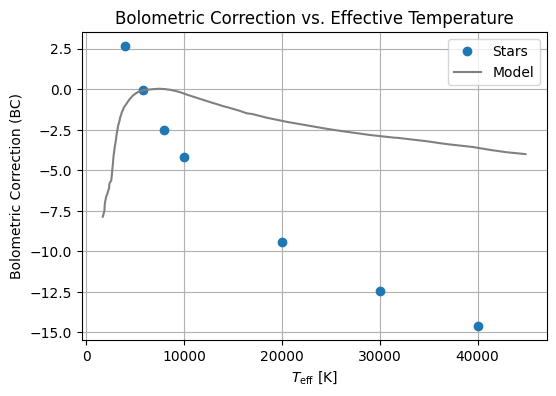

In [17]:
# Create the plot
plt.figure(figsize=(6,4))
plt.plot(temperatures, BC, 'o', label='Stars')

# Optional: include model from CSV
# model_data = np.loadtxt('model.csv', delimiter=',', skiprows=1)
plt.plot(T_model,BC_model, '-', color='grey', label='Model')

plt.xlabel(r'$T_{\rm eff}$ [K]')
plt.ylabel('Bolometric Correction (BC)')
plt.title('Bolometric Correction vs. Effective Temperature')
#plt.gca().invert_xaxis()  # optional: hotter stars to the left (like HR diagram)
plt.legend()
plt.grid(True)
plt.show()